<a href="https://colab.research.google.com/github/BaronVonBussin/Stuff/blob/main/maximum_likelihood_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Observed: 7 heads, 3 tails in 10 flips


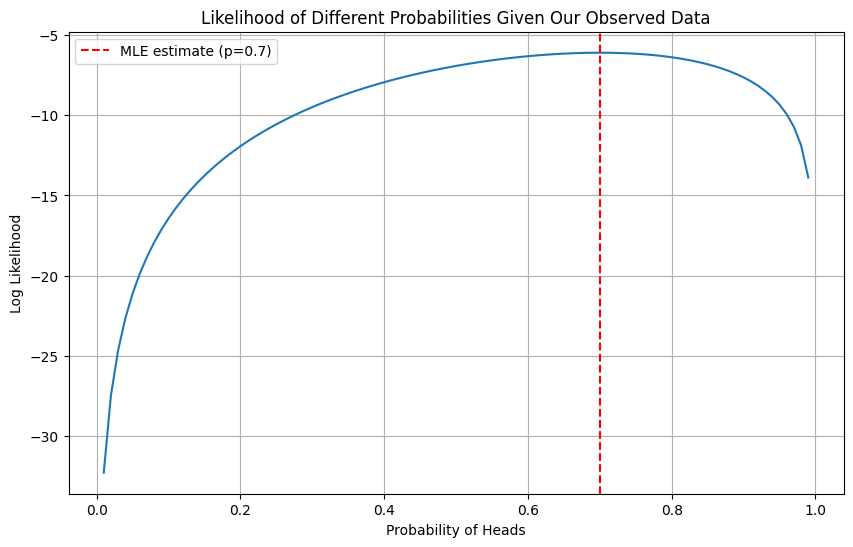


MLE estimate: p = 0.700

If p = 0.3:
Probability of seeing exactly HTHTHHHHTH = 0.000075

If p = 0.5:
Probability of seeing exactly HTHTHHHHTH = 0.000977

If p = 0.7:
Probability of seeing exactly HTHTHHHHTH = 0.002224

If p = 0.9:
Probability of seeing exactly HTHTHHHHTH = 0.000478


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Our observed sequence
sequence = 'HTHTHHHHTH'

# Count heads and tails
n_heads = sum(1 for x in sequence if x == 'H')
n_tails = len(sequence) - n_heads

print(f"Observed: {n_heads} heads, {n_tails} tails in {len(sequence)} flips")

# Function to compute negative log likelihood
# (we minimize negative log likelihood instead of maximizing likelihood)
def neg_log_likelihood(p):
    if p <= 0 or p >= 1:  # probability must be between 0 and 1
        return float('inf')
    return -(n_heads * np.log(p) + n_tails * np.log(1-p))

# Test different probabilities to show likelihood
ps = np.linspace(0.01, 0.99, 99)
likelihoods = [-neg_log_likelihood(p) for p in ps]

# Plot likelihood for different probabilities
plt.figure(figsize=(10, 6))
plt.plot(ps, likelihoods)
plt.axvline(x=0.7, color='r', linestyle='--', label='MLE estimate (p=0.7)')
plt.xlabel('Probability of Heads')
plt.ylabel('Log Likelihood')
plt.title('Likelihood of Different Probabilities Given Our Observed Data')
plt.grid(True)
plt.legend()
plt.show()

# Find the maximum likelihood estimate
result = minimize(neg_log_likelihood, x0=0.5)
mle_p = result.x[0]

print(f"\nMLE estimate: p = {mle_p:.3f}")

# Calculate probability of our exact sequence for different p values
p_values = [0.3, 0.5, 0.7, 0.9]
for p in p_values:
    prob = (p ** n_heads) * ((1-p) ** n_tails)
    print(f"\nIf p = {p}:")
    print(f"Probability of seeing exactly HTHTHHHHTH = {prob:.6f}")

Sequence 1 (HTHTHHHHTH): 7 heads, 3 tails
Sequence 2 (HHHHHHHTTT): 7 heads, 3 tails


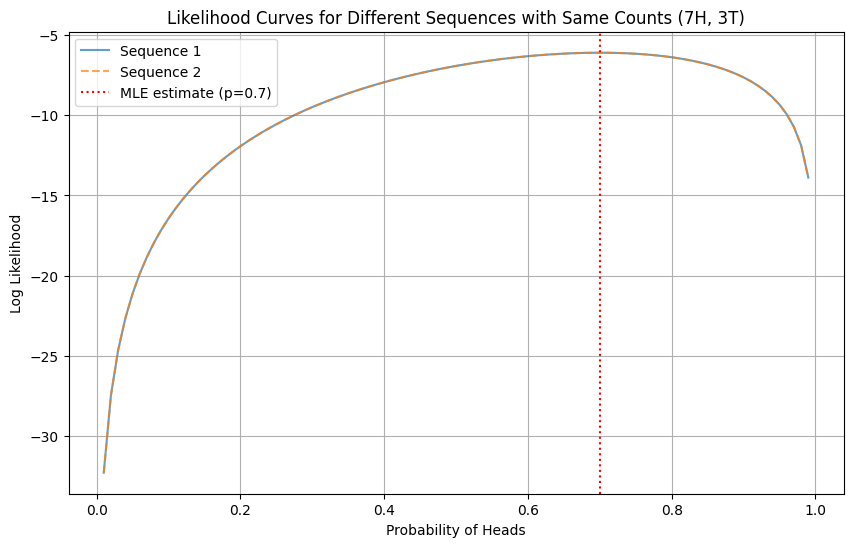


MLE estimate for sequence 1: p = 0.700
MLE estimate for sequence 2: p = 0.700


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


In [2]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Let's test two different sequences with same H/T ratio
sequence1 = 'HTHTHHHHTH'  # original sequence
sequence2 = 'HHHHHHHTTT'  # different sequence, same counts

# Count function
def get_counts(sequence):
    n_heads = sum(1 for x in sequence if x == 'H')
    n_tails = len(sequence) - n_heads
    return n_heads, n_tails

# Get counts for both sequences
n_heads1, n_tails1 = get_counts(sequence1)
n_heads2, n_tails2 = get_counts(sequence2)

print(f"Sequence 1 ({sequence1}): {n_heads1} heads, {n_tails1} tails")
print(f"Sequence 2 ({sequence2}): {n_heads2} heads, {n_tails2} tails")

# Function to compute negative log likelihood (using counts only!)
def neg_log_likelihood(p, n_heads, n_tails):
    if p <= 0 or p >= 1:
        return float('inf')
    return -(n_heads * np.log(p) + n_tails * np.log(1-p))

# Test different probabilities
ps = np.linspace(0.01, 0.99, 99)
likelihoods1 = [-neg_log_likelihood(p, n_heads1, n_tails1) for p in ps]
likelihoods2 = [-neg_log_likelihood(p, n_heads2, n_tails2) for p in ps]

# Plot to show they're identical
plt.figure(figsize=(10, 6))
plt.plot(ps, likelihoods1, label='Sequence 1', alpha=0.7)
plt.plot(ps, likelihoods2, '--', label='Sequence 2', alpha=0.7)
plt.axvline(x=0.7, color='r', linestyle=':', label='MLE estimate (p=0.7)')
plt.xlabel('Probability of Heads')
plt.ylabel('Log Likelihood')
plt.title('Likelihood Curves for Different Sequences with Same Counts (7H, 3T)')
plt.grid(True)
plt.legend()
plt.show()

# Find MLE for both sequences
result1 = minimize(lambda p: neg_log_likelihood(p, n_heads1, n_tails1), x0=0.5)
result2 = minimize(lambda p: neg_log_likelihood(p, n_heads2, n_tails2), x0=0.5)

print(f"\nMLE estimate for sequence 1: p = {result1.x[0]:.3f}")
print(f"MLE estimate for sequence 2: p = {result2.x[0]:.3f}")

Sequence 1 (HTHTHHHHTH): 7 heads, 3 tails
Sequence 2 (HHHHHHHTTT): 7 heads, 3 tails


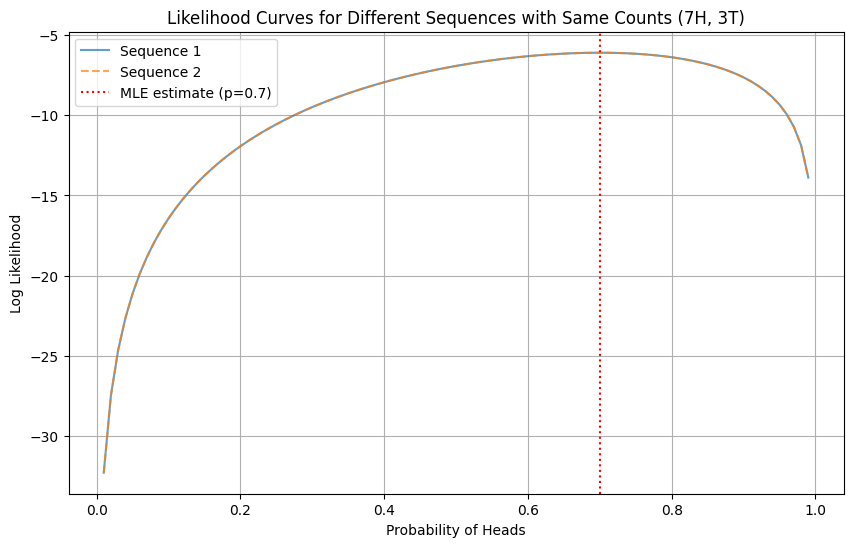


MLE estimate for sequence 1: p = 0.700
MLE estimate for sequence 2: p = 0.700


In [3]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Test sequences
sequence1 = 'HTHTHHHHTH'
sequence2 = 'HHHHHHHTTT'

def get_counts(sequence):
    n_heads = sum(1 for x in sequence if x == 'H')
    n_tails = len(sequence) - n_heads
    return n_heads, n_tails

n_heads1, n_tails1 = get_counts(sequence1)
n_heads2, n_tails2 = get_counts(sequence2)

print(f"Sequence 1 ({sequence1}): {n_heads1} heads, {n_tails1} tails")
print(f"Sequence 2 ({sequence2}): {n_heads2} heads, {n_tails2} tails")

# Modified likelihood function without returning infinity
def neg_log_likelihood(p, n_heads, n_tails):
    return -(n_heads * np.log(p) + n_tails * np.log(1-p))

# Test different probabilities
ps = np.linspace(0.01, 0.99, 99)
likelihoods1 = [-neg_log_likelihood(p, n_heads1, n_tails1) for p in ps]
likelihoods2 = [-neg_log_likelihood(p, n_heads2, n_tails2) for p in ps]

plt.figure(figsize=(10, 6))
plt.plot(ps, likelihoods1, label='Sequence 1', alpha=0.7)
plt.plot(ps, likelihoods2, '--', label='Sequence 2', alpha=0.7)
plt.axvline(x=0.7, color='r', linestyle=':', label='MLE estimate (p=0.7)')
plt.xlabel('Probability of Heads')
plt.ylabel('Log Likelihood')
plt.title('Likelihood Curves for Different Sequences with Same Counts (7H, 3T)')
plt.grid(True)
plt.legend()
plt.show()

# Find MLE with bounds to avoid warnings
result1 = minimize(lambda p: neg_log_likelihood(p[0], n_heads1, n_tails1),
                  x0=[0.5],
                  bounds=[(0.001, 0.999)]) # avoid exact 0 and 1
result2 = minimize(lambda p: neg_log_likelihood(p[0], n_heads2, n_tails2),
                  x0=[0.5],
                  bounds=[(0.001, 0.999)])

print(f"\nMLE estimate for sequence 1: p = {result1.x[0]:.3f}")
print(f"MLE estimate for sequence 2: p = {result2.x[0]:.3f}")